In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df = pd.read_csv("health_train.csv")

In [3]:
df2 = df.copy()

In [4]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
age,21.000,36.977,18.000,37.000,58.000,46.000,25.222,29.486,26.520,47.493,...,41.836,25.000,20.000,49.815,32.877,31.058,36.834,56.000,49.000,33.000
sex,male,female,male,male,male,male,male,female,male,female,...,male,male,male,female,male,male,male,female,male,male
bmi,25.745,25.744,30.030,30.677,32.010,26.620,31.193,24.223,25.066,27.302,...,33.647,26.220,35.122,33.878,33.215,27.555,30.322,36.180,36.430,36.641
smoker,no,yes,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,no
region,northeast,southeast,southeast,northeast,southeast,southeast,northeast,northwest,southwest,northwest,...,northeast,northeast,southwest,northwest,southwest,southeast,northeast,northwest,northwest,southwest
children,2,3,1,3,1,1,4,2,5,3,...,4,0,5,4,5,4,3,2,3,5
charges,3279.869,21454.494,1720.354,6801.438,11946.626,7742.110,21736.328,4916.953,5515.809,17009.335,...,14799.031,2721.321,4853.658,11247.445,6628.269,5889.104,6788.534,12401.747,10376.295,6658.237


In [ ]:
df.describe()

,age,bmi,children,charges
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,39.003033,30.575497,2.488400,12679.311518
std,12.264536,5.390169,1.707346,10593.270485
min,18.000000,15.960000,0.000000,1121.873900
25%,28.845667,26.717647,1.000000,5612.780878
50%,39.350208,30.200000,2.000000,9455.047274
75%,48.688741,34.046166,4.000000,14440.628060
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2500 non-null   float64
 1   sex       2500 non-null   object 
 2   bmi       2500 non-null   float64
 3   smoker    2500 non-null   object 
 4   region    2500 non-null   object 
 5   children  2500 non-null   int64  
 6   charges   2500 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 136.8+ KB


In [ ]:
df.sex = df.sex.map({"male": 1, "female": 0})

In [ ]:
df.smoker = df.smoker.map({"yes": 1, "no": 0})

In [ ]:
df.region.value_counts()

southeast    699
northwest    613
northeast    606
southwest    582
Name: region, dtype: int64

In [ ]:
df["region"] = df["region"].str.get_dummies()

In [ ]:
df=pd.get_dummies(df,drop_first=True)
df

,age,sex,bmi,smoker,children,charges,region_northwest,region_southeast,region_southwest
0,21.000000,1,25.745000,0,2,3279.868550,0,0,0
1,36.976978,0,25.744165,1,3,21454.494239,0,1,0
2,18.000000,1,30.030000,0,1,1720.353700,0,1,0
3,37.000000,1,30.676891,0,3,6801.437542,0,0,0
4,58.000000,1,32.010000,0,1,11946.625900,0,1,0
...,...,...,...,...,...,...,...,...,...
2495,31.058051,1,27.555148,0,4,5889.103901,0,1,0
2496,36.833818,1,30.322446,0,3,6788.534095,0,0,0
2497,56.000000,0,36.179587,0,2,12401.746575,1,0,0
2498,49.000000,1,36.429614,0,3,10376.294629,1,0,0


In [ ]:
X = df.drop(["charges"], axis=1)
y = df["charges"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
scaler =MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

**linear**

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [ ]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [ ]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.700,0.762
mae,3859.973,3650.336
mse,33204709.549,28234366.015
rmse,5762.353,5313.602


In [ ]:
lm2=LinearRegression()

In [ ]:
lm2.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [ ]:
ls2 =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls2

,linear_train,linear_test
R2,-5254.087,-5064.131
mae,746476.322,758613.889
mse,580711946861.084,599668775915.143
rmse,762044.583,774382.835


**ridge**

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [ ]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [ ]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [ ]:
ridge_cv_model.alpha_

0.42000000000000004

In [ ]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [ ]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.700,0.761
mae,3860.192,3650.042
mse,33205173.485,28237686.417
rmse,5762.393,5313.914


In [ ]:
pd.concat([ls, rcs], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test
R2,0.700,0.762,0.700,0.761
mae,3859.973,3650.336,3860.192,3650.042
mse,33204709.549,28234366.015,33205173.485,28237686.417
rmse,5762.353,5313.602,5762.393,5313.914


**lasso**

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)


LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.alpha_

1.0

In [ ]:
alpha_space2 = np.linspace(1, 10, 100)
alpha_space2

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [ ]:
lasso_cv_model = LassoCV(alphas = alpha_space2, cv = 5, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,...
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ]),
        cv=

In [ ]:
lasso_cv_model.alpha_

1.0

In [ ]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =1)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [ ]:
lcv = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcv

,lasso_cv_train,lasso_cv_test
R2,0.700,0.762
mae,3859.347,3648.875
mse,33204844.684,28226357.166
rmse,5762.365,5312.848


In [ ]:
pd.concat([ls, rcs, lcv], axis = 1)

,linear_train,linear_test,ridge_cv_train,ridge_cv_test,lasso_cv_train,lasso_cv_test
R2,0.700,0.762,0.700,0.761,0.700,0.762
mae,3859.973,3650.336,3860.192,3650.042,3859.347,3648.875
mse,33204709.549,28234366.015,33205173.485,28237686.417,33204844.684,28226357.166
rmse,5762.353,5313.602,5762.393,5313.914,5762.365,5312.848


In [ ]:
ls_df = pd.DataFrame(lm.coef_, columns=["linear_model"])
rcs_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv"])
lcv_df = pd.DataFrame(lasso_cv_model.coef_, columns=["lasso_cv"])

In [ ]:
pd.concat([ls_df, rcs_df, lcv_df], axis = 1)

,linear_model,ridge_cv,lasso_cv
0,11422.246,11358.717,11409.856
1,1189.689,1194.823,1188.356
2,10043.711,9825.577,9996.863
3,22297.157,22204.661,22289.046
4,2752.594,2716.890,2740.013
5,-2474.913,-2449.637,-2457.343
6,-2480.520,-2448.761,-2461.539
7,-2735.326,-2721.554,-2718.405


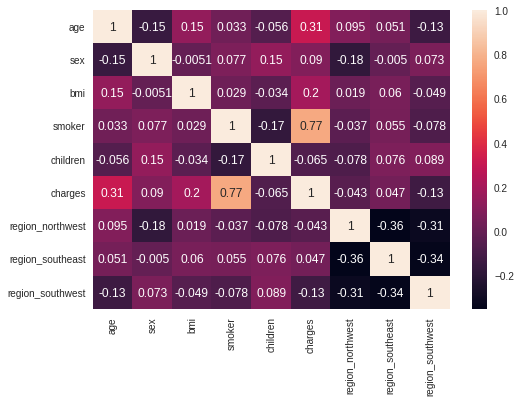

In [ ]:
sns.heatmap(df.corr(), annot=True);

In [ ]:
alpha_space3 = np.linspace(0.01, 10, 1000)
alpha_space3

array([ 0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,
        0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,  0.27,
        0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,
        0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,  0.45,
        0.46,  0.47,  0.48,  0.49,  0.5 ,  0.51,  0.52,  0.53,  0.54,
        0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ,  0.61,  0.62,  0.63,
        0.64,  0.65,  0.66,  0.67,  0.68,  0.69,  0.7 ,  0.71,  0.72,
        0.73,  0.74,  0.75,  0.76,  0.77,  0.78,  0.79,  0.8 ,  0.81,
        0.82,  0.83,  0.84,  0.85,  0.86,  0.87,  0.88,  0.89,  0.9 ,
        0.91,  0.92,  0.93,  0.94,  0.95,  0.96,  0.97,  0.98,  0.99,
        1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,  1.06,  1.07,  1.08,
        1.09,  1.1 ,  1.11,  1.12,  1.13,  1.14,  1.15,  1.16,  1.17,
        1.18,  1.19,  1.2 ,  1.21,  1.22,  1.23,  1.24,  1.25,  1.26,
        1.27,  1.28,

In [ ]:
lasso_cv_model2 = LassoCV(alphas = alpha_space3, cv = 5, max_iter=100000, random_state=42)

In [ ]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,...
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ]),
        cv=

In [ ]:
lasso_cv_model.alpha_

1.0

In [ ]:
lm_final = LinearRegression()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
lm_final.fit(X_scaled, y)

LinearRegression()

In [ ]:
y_pred = lm_final.predict(X_test_scaled)
y_train_pred = lm_final.predict(X_train_scaled)

In [ ]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.699,0.764
mae,3857.136,3624.846
mse,33234294.265,27972975.070
rmse,5764.919,5288.948


In [ ]:
df_test.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450
age,39.297,40.368,32.882,62.000,32.476,22.318,46.160,39.474,41.551,19.000,44.045,26.000,52.037,39.458,49.000,22.951,35.178,20.000,25.000,34.417,24.016,53.879,41.917,43.000,39.129,29.340,41.036,25.000,18.000,49.000,24.554,31.087,19.407,45.463,22.000,29.210,33.000,44.000,45.432,61.000,62.000,52.310,23.000,19.000,28.000,39.000,29.970,48.040,59.000,39.766,...,20.000,31.000,42.000,56.762,24.000,49.830,38.217,32.000,43.000,20.000,35.000,54.359,47.000,45.000,41.714,47.437,33.235,22.823,21.000,39.766,20.247,60.000,45.040,52.000,24.952,50.581,42.308,37.000,48.211,48.399,48.728,55.108,29.000,21.000,32.157,37.000,22.190,48.327,37.000,25.997,39.000,30.000,42.311,61.000,21.000,43.000,31.374,50.371,49.202,49.000
sex,male,female,male,female,male,male,male,male,male,male,female,female,male,female,male,male,male,male,female,female,female,male,male,female,female,female,female,male,female,male,male,female,male,female,male,male,female,male,female,male,male,female,female,male,female,male,male,female,female,male,...,female,female,female,male,female,male,male,male,male,male,male,female,male,female,male,male,female,male,male,male,male,female,male,female,male,male,male,male,female,female,female,male,female,male,male,female,male,female,male,male,male,female,male,male,female,male,male,female,female,male
bmi,29.978,27.928,41.577,30.495,30.323,32.305,34.097,25.238,31.215,25.555,27.301,30.221,33.204,23.061,28.690,32.903,29.145,33.865,34.485,33.815,23.310,38.578,26.205,32.560,34.164,23.455,21.975,27.550,28.215,25.840,24.249,38.816,28.741,25.000,37.070,27.128,19.095,32.015,24.953,36.300,31.460,30.170,28.490,44.880,26.315,42.655,39.537,41.079,27.720,19.067,...,33.300,25.800,25.300,29.947,25.270,31.934,33.963,30.800,27.800,22.000,28.900,37.610,38.940,28.142,30.224,37.579,41.780,26.606,31.020,26.081,29.856,36.005,26.423,38.380,30.790,26.621,33.930,24.320,36.861,37.957,38.490,30.114,29.590,31.100,32.136,34.800,32.185,40.921,36.190,24.033,34.100,39.050,36.553,28.310,39.490,35.532,28.279,26.766,31.397,30.900
smoker,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,no,no,no,yes,no,no,yes,yes,no,no,no,no,no,yes,no,no,no,no,yes,no,yes,no,no,yes,no,no,yes,yes,no,no,no,no,no,no,...,no,no,no,no,no,no,yes,no,yes,no,no,no,yes,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,yes,yes,yes,no,yes,no,no,no,yes
region,northwest,southeast,southwest,northwest,northeast,northeast,northwest,southeast,southeast,northwest,southeast,southeast,northeast,northeast,northwest,northeast,southeast,southwest,northwest,southwest,southwest,southwest,northeast,southeast,southeast,northwest,southwest,northwest,northeast,northwest,southwest,southeast,southwest,southeast,southeast,southwest,northeast,northwest,southeast,southwest,southeast,northeast,southeast,southeast,northwest,northeast,northeast,northwest,southeast,southeast,...,southwest,southwest,southwest,southwest,northeast,northwest,northwest,southwest,southwest,southwest,southwest,northwest,southeast,southeast,southwest,southeast,northeast,southwest,southeast,southeast,southeast,northeast,northeast,northeast,southwest,northeast,northeast,northwest,northwest,northwest,northwest,southwest,southeast,southwest,northeast,southwest,northeast,northwest,southeast,southwest,southeast,southeast,southeast,northwest,southeast,southeast,northeast,northwest,northwest,southwest
children,4,5,5,2,4,5,3,5,5,0,5,1,1,3,3,5,4,5,0,2,3,1,1,3,5,3,5,0,0,2,5,2,5,5,2,5,2,2,5,1,1,2,1,0,3,0,5,4,3,5,...,0,2,1,4,0,3,2,3,0,1,3,3,2,2,4,2,3,5,0,5,4,0,3,2,3,3,4,2,4,4,4,4,1,0,4,2,5,4,0,5,2,3,3,1,0,2,4,4,4,0


In [ ]:
df_test.sex = df_test.sex.map({"male": 1, "female": 0})

In [ ]:
df_test.smoker = df_test.smoker.map({"yes": 1, "no": 0})

In [ ]:
df_test.region.value_counts()

southeast    125
northwest    121
southwest    112
northeast     93
Name: region, dtype: int64

In [ ]:
df_test["region"] = df_test["region"].str.get_dummies()

In [ ]:
df_test=pd.get_dummies(df_test,drop_first=True)
df_test

,age,sex,bmi,smoker,region,children
0,39.297,1,29.978,0,0,4
1,40.368,0,27.928,0,0,5
2,32.882,1,41.577,0,0,5
3,62.000,0,30.495,0,0,2
4,32.476,1,30.323,1,1,4
...,...,...,...,...,...,...
446,43.000,1,35.532,1,0,2
447,31.374,1,28.279,0,1,4
448,50.371,0,26.766,0,0,4
449,49.202,0,31.397,0,0,4


In [ ]:
df_test = pd.read_csv("health_test.csv")

In [ ]:
df_test

,age,sex,bmi,smoker,region,children
0,39.297,male,29.978,no,northwest,4
1,40.368,female,27.928,no,southeast,5
2,32.882,male,41.577,no,southwest,5
3,62.000,female,30.495,no,northwest,2
4,32.476,male,30.323,yes,northeast,4
...,...,...,...,...,...,...
446,43.000,male,35.532,yes,southeast,2
447,31.374,male,28.279,no,northeast,4
448,50.371,female,26.766,no,northwest,4
449,49.202,female,31.397,no,northwest,4


In [ ]:
df_test.sex = df_test.sex.map({"male": 1, "female": 0})

In [ ]:
df_test.smoker = df_test.smoker.map({"yes": 1, "no": 0})

In [ ]:
df_test.region.value_counts()

southeast    125
northwest    121
southwest    112
northeast     93
Name: region, dtype: int64

In [ ]:
df_test=pd.get_dummies(df_test,drop_first=True)
df_test

,age,sex,bmi,smoker,children,region_northwest,region_southeast,region_southwest
0,39.297,1,29.978,0,4,1,0,0
1,40.368,0,27.928,0,5,0,1,0
2,32.882,1,41.577,0,5,0,0,1
3,62.000,0,30.495,0,2,1,0,0
4,32.476,1,30.323,1,4,0,0,0
...,...,...,...,...,...,...,...,...
446,43.000,1,35.532,1,2,0,1,0
447,31.374,1,28.279,0,4,0,0,0
448,50.371,0,26.766,0,4,1,0,0
449,49.202,0,31.397,0,4,1,0,0


In [ ]:
test_scaled = scaler.fit_transform(df_test)

In [ ]:
y_final_pred = lm_final.predict(test_scaled)

In [ ]:
y_final_pred = pd.DataFrame(y_final_pred, columns = ["y_final_pred"])

In [ ]:
np.average(y_final_pred)

13896.308396222763

In [ ]:
y_final_pred.describe()

,y_final_pred
count,451.000
mean,13896.308
std,9841.927
min,-2344.903
25%,7700.224
50%,10583.576
75%,14697.449
max,40366.072


In [ ]:
y_final_pred.to_csv("C9191.csv", index=False)